In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN


# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Validation
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from collections import Counter
from sklearn.decomposition import PCA

In [1]:
def confusion_matrix_plot(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

In [18]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [153]:
def box_dist_plot(dataframe, column):
    plt.subplot(1,2,1)
    dataframe.boxplot(column)
    
    plt.subplot(1,2,2)
    sns.distplot(dataframe[column])
    
    plt.tight_layout()

In [358]:
def coef_importance(X_train, model):
    temp = pd.DataFrame(np.std(X_train, 0), columns=['std'])
    temp['coef'] = model.coef_[0].tolist()
    temp['weight'] = temp['std']*temp['coef']
    temp_sort = temp.sort_values('weight', ascending=False)['weight']
    plt.bar(temp_sort.index, temp_sort)
    plt.xticks(rotation=90)


# dataset

In [124]:
df = pd.read_csv('merge_test1.csv')

In [125]:
# drop extra col
df = df.drop('Unnamed: 0', axis=1)

df.head()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 10th pass,education_Class 12th pass,education_Class 9th or below,...,title_others,source_Referrals,source_WhatsApp OptIn Form,source_others,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
0,25.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,4238,149,57,92,4.504703e+05,34.3415
1,20.0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,2746,156,58,98,3.035038e+05,25.9330
2,24.0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,3722,92,33,59,3.426029e+05,16.8930
3,22.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,3617,97,35,62,9.442864e+05,20.0390
4,19.0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,2689,83,30,53,1.033980e+06,11.8200


In [126]:
df.describe()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 10th pass,education_Class 12th pass,education_Class 9th or below,...,title_others,source_Referrals,source_WhatsApp OptIn Form,source_others,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
count,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,...,10534.00000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,1.053400e+04,10534.000000
mean,29.211885,0.003892,0.030473,0.057148,0.043858,0.190906,0.640782,0.079172,0.113917,0.006740,...,0.59626,0.662996,0.011961,0.286406,352.277767,60.832637,22.136985,38.695652,3.725202e+04,25.148520
std,10.875285,0.062269,0.171892,0.232137,0.204789,0.393034,0.479794,0.270020,0.317725,0.081825,...,0.49067,0.472709,0.108717,0.452103,718.006987,83.476012,32.879492,51.144904,1.371072e+05,685.040020
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,25.000000,8.000000,16.000000,1.321667e+00,0.253000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,49.000000,37.000000,13.000000,24.000000,1.189769e+01,5.474375
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.00000,1.000000,0.000000,0.000000,184.000000,45.000000,16.000000,29.000000,4.232757e+01,10.955750
75%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.00000,1.000000,0.000000,1.000000,242.000000,61.000000,22.000000,39.000000,1.786800e+04,23.165750
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,4944.000000,5319.000000,1872.000000,3447.000000,3.519348e+06,69527.473500


In [245]:
X = df.drop('label', axis=1)
y = df['label']

# Visualization

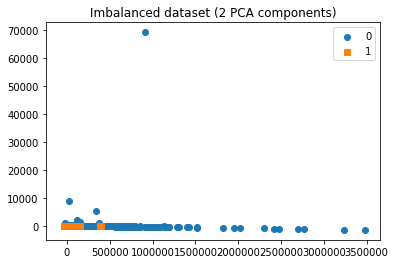

In [136]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

# correlation

In [117]:
cor = df.corr()

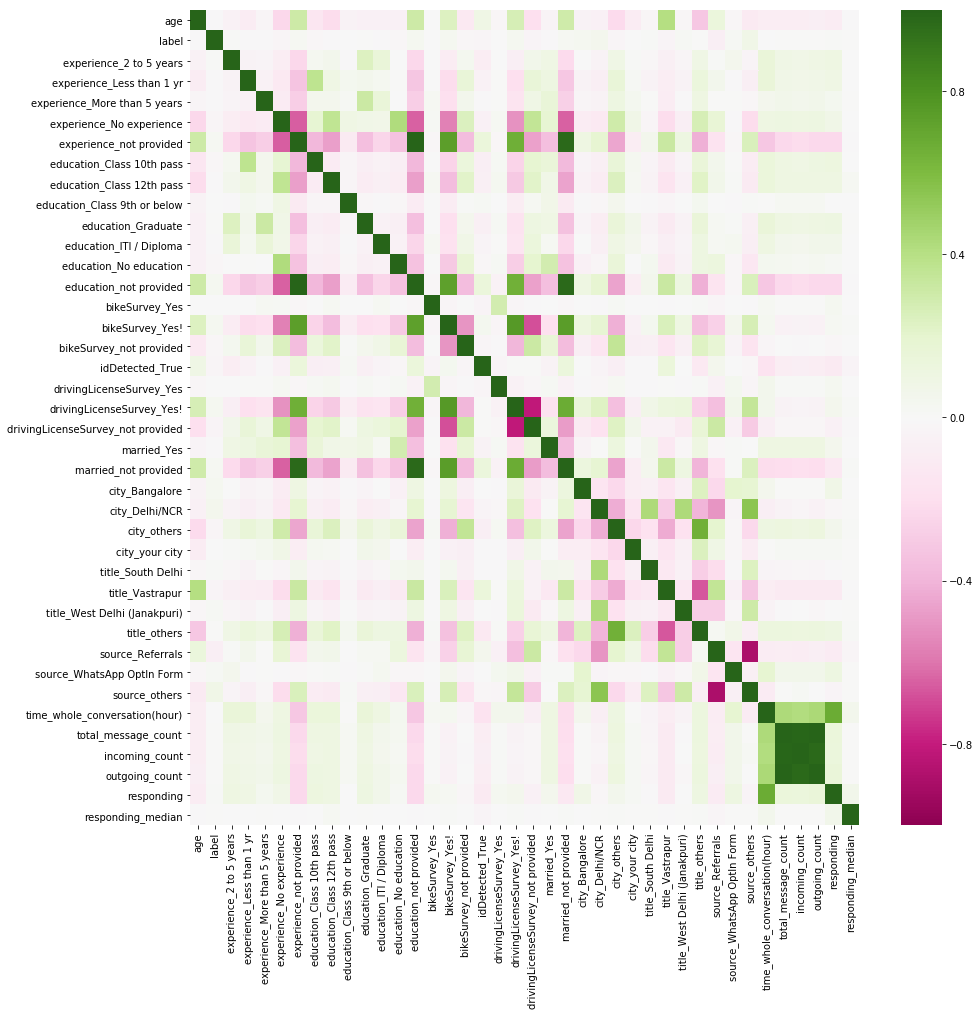

In [118]:
plt.figure(figsize=(15, 15))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, cmap='PiYG', vmax=1, vmin=-1)

# Remove some outliers and columns with high correlation

In [213]:
df_cluster.drop(['total_message_count', 'outgoing_count'], axis=1, inplace=True)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


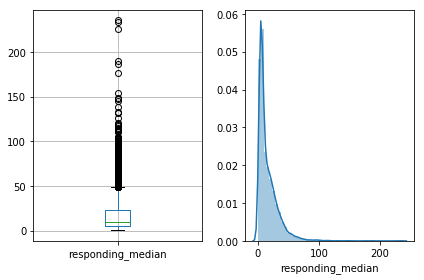

In [207]:
box_dist_plot(df_cluster,'responding_median')

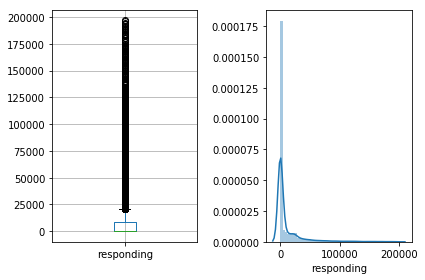

In [208]:
box_dist_plot(df_cluster,'responding')

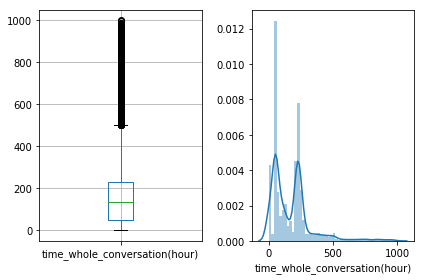

In [209]:
box_dist_plot(df_cluster,'time_whole_conversation(hour)')

In [206]:
# some outliers
df_cluster = df[(df['responding_median']<500) & (df['responding']<200000) & (df['time_whole_conversation(hour)']<1000)]

In [216]:
df_cluster.describe()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 10th pass,education_Class 12th pass,education_Class 9th or below,...,title_Vastrapur,title_West Delhi (Janakpuri),title_others,source_Referrals,source_WhatsApp OptIn Form,source_others,time_whole_conversation(hour),incoming_count,responding,responding_median
count,9694.000000,9694.000000,9694.000000,9694.00000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,...,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000
mean,29.579637,0.004023,0.023829,0.04838,0.040231,0.174954,0.685682,0.067774,0.098927,0.006499,...,0.246235,0.052713,0.576130,0.674438,0.006911,0.296988,172.810398,18.759336,10998.281008,16.313630
std,11.109817,0.063304,0.152525,0.21458,0.196511,0.379947,0.464268,0.251370,0.298580,0.080357,...,0.430839,0.223471,0.494196,0.468609,0.082852,0.456955,160.797308,13.328363,26199.945408,16.553573
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.321667,0.253000
25%,23.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,13.000000,10.974034,5.249875
50%,27.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,136.000000,15.000000,32.965692,9.996500
75%,33.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,230.000000,21.000000,8357.465571,22.631000
max,99.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,998.000000,465.000000,196875.261346,235.292000


### visulaizaiton

In [566]:
X = df_cluster.drop('label', axis=1)
y = df_cluster['label']

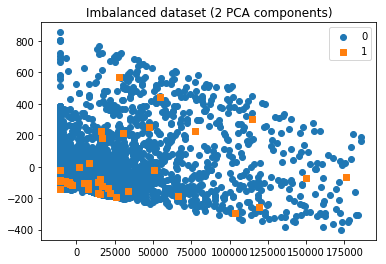

In [249]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_2d_space(X_pca, y, 'Imbalanced dataset (2 PCA components)')

### [under-sampling]  visualization

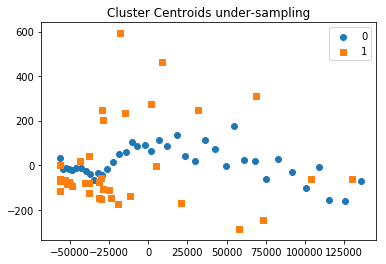

In [259]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy='majority')
X_cc, y_cc = cc.fit_resample(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cc)
plot_2d_space(X_pca, y_cc, 'Cluster Centroids under-sampling')

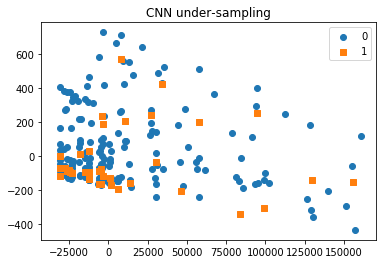

In [452]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(sampling_strategy='majority')
X_cnn, y_cnn = cnn.fit_resample(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cnn)
plot_2d_space(X_pca, y_cnn, 'CNN under-sampling')

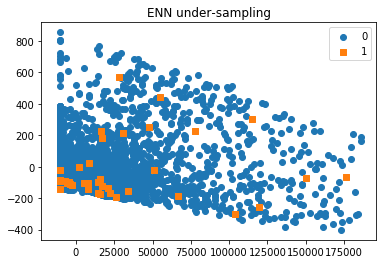

In [453]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_enn, y_enn = enn.fit_resample(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_enn)
plot_2d_space(X_pca, y_enn, 'ENN under-sampling')

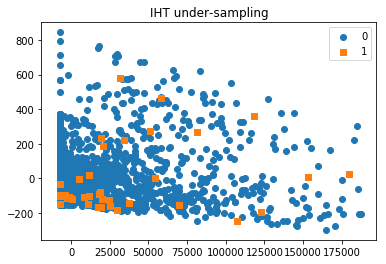

In [457]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold()
X_iht, y_iht = iht.fit_resample(X,y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iht)
plot_2d_space(X_pca, y_iht, 'IHT under-sampling')

# train test split first

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

### training data + visualization

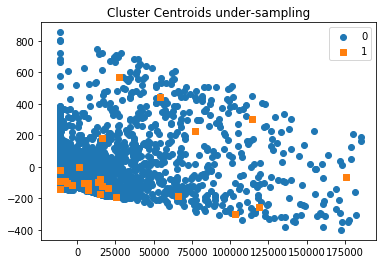

In [459]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plot_2d_space(X_pca, y_train, 'Cluster Centroids under-sampling')

### testing data + visualization

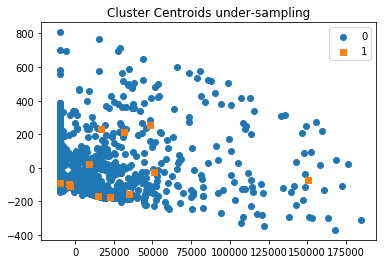

In [460]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plot_2d_space(X_pca, y_test, 'Cluster Centroids under-sampling')

# [under-sampling] training data only

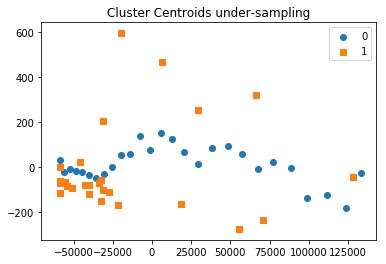

In [461]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy='majority')
X_cc, y_cc = cc.fit_resample(X_train, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cc)
plot_2d_space(X_pca, y_cc, 'Cluster Centroids under-sampling')

# train test split first

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6, stratify=y)

### training data + visualization

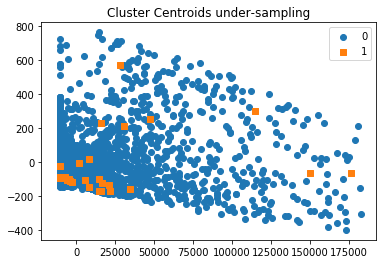

In [523]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plot_2d_space(X_pca, y_train, 'Cluster Centroids under-sampling')

### testing data + visualization

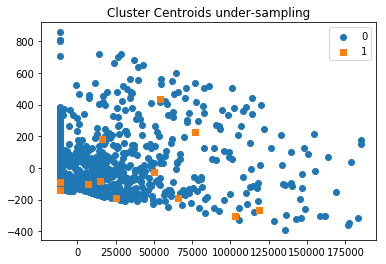

In [524]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plot_2d_space(X_pca, y_test, 'Cluster Centroids under-sampling')

# [under-sampling] training data only

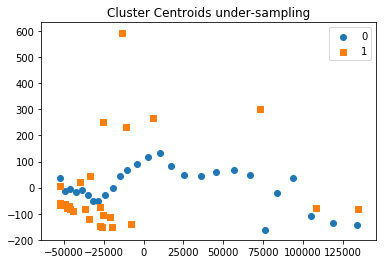

In [562]:
from imblearn.under_sampling import ClusterCentroids
#from sklearn.cluster import KMeans
#km = KMeans(n_clusters=2)

cc = ClusterCentroids(sampling_strategy='majority', estimator=km)
X_cc, y_cc = cc.fit_resample(X_train, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cc)
plot_2d_space(X_pca, y_cc, 'Cluster Centroids under-sampling')

# [under-sampling] testing data only

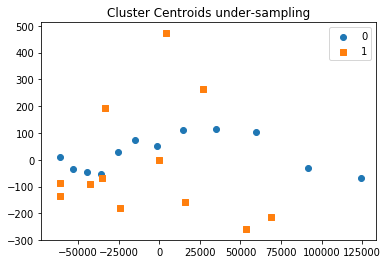

In [531]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy='majority')
X_test_cc, y_test_cc = cc.fit_resample(X_test, y_test)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_cc)
plot_2d_space(X_pca, y_test_cc, 'Cluster Centroids under-sampling')

In [532]:
sc = StandardScaler()
sc.fit(X_cc)
X_train_std = sc.transform(X_cc)
X_test_std = sc.transform(X_test)

# KNN

In [540]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn.fit(X_train_std, y_cc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [541]:
y_pred = knn.predict(X_test_std)
y_pred_prob = knn.predict_proba(X_test_std)[:,1]

In [542]:
confusion_matrix(y_test, y_pred)

array([[2092,  805],
       [   3,    9]])

Text(0.5, 1.0, 'ROC Curve')

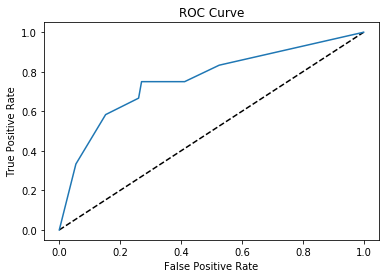

In [543]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [539]:
for i in np.arange(1, 11, 1):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_train_std, y_cc)
    y_pred = knn.predict(X_test_std)
    print(confusion_matrix(y_test, y_pred))

[[1617 1280]
 [   2   10]]
[[2016  881]
 [   3    9]]
[[1990  907]
 [   3    9]]
[[2075  822]
 [   3    9]]
[[2034  863]
 [   3    9]]
[[2050  847]
 [   3    9]]
[[2043  854]
 [   3    9]]
[[2061  836]
 [   3    9]]
[[2053  844]
 [   3    9]]
[[2092  805]
 [   3    9]]


# Gradient boosting

In [544]:
gbrt=GradientBoostingClassifier(random_state=1, n_estimators=100)
gbrt.fit(X_train_std, y_cc)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [545]:
y_pred = gbrt.predict(X_test_std)
y_pred_prob = gbrt.predict_proba(X_test_std)[:,1]
print(confusion_matrix(y_test, y_pred))

[[  81 2816]
 [   0   12]]


Text(0.5, 1.0, 'ROC Curve')

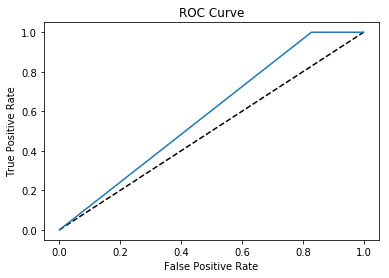

In [547]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# XGboost

In [488]:
from xgboost import XGBClassifier

In [548]:
xgbrt = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
xgbrt.fit(X_train_std, y_cc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [549]:
y_pred = xgbrt.predict(X_test_std)
y_pred_prob = xgbrt.predict_proba(X_test_std)[:,1]
print(confusion_matrix(y_test, y_pred))

[[ 208 2689]
 [   0   12]]


Text(0.5, 1.0, 'ROC Curve')

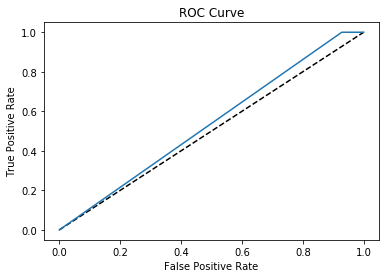

In [551]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [564]:
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import numpy as np

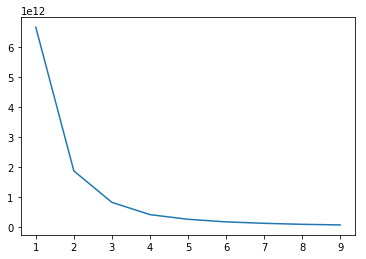

In [567]:
from sklearn.cluster import KMeans
# Choosing the optimal k
k_range = range(1,10)
# Try clustering the data for k values ranging 1 to 10
k_means_var = [KMeans(n_clusters = k).fit(X) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# Calculate within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# Visualize the elbow method for determining k
import matplotlib.pyplot as plt
plt.plot(k_range, wcss)
plt.show()

In [577]:
pca = PCA(n_components=2)
pca.fit_transform(centroids[1])


array([[ 4.38685216e+04,  3.63822887e-12],
       [-4.38685216e+04,  3.63822887e-12]])

In [584]:
centroids[1]

array([[ 2.97641520e+01,  2.18234186e-02,  4.61947491e-02,
         3.97695801e-02,  1.70599313e-01,  6.97906281e-01,
         6.43624682e-02,  9.46050737e-02,  6.53594771e-03,
         5.43923784e-02,  2.84701451e-02,  5.66079539e-02,
         6.95026033e-01,  1.10778775e-04,  7.62490307e-01,
         7.42217791e-02,  9.18466822e-01,  9.97008973e-04,
         6.58247480e-01,  2.62656475e-01,  5.68295115e-02,
         6.96909272e-01,  7.56619032e-02,  2.21225213e-01,
         3.65569957e-01,  7.90960452e-02,  5.19552454e-02,
         2.58446882e-01,  5.02935638e-02,  5.69292124e-01,
         6.86606846e-01,  6.97906281e-03,  2.86030796e-01,
         1.51216794e+02,  1.81610723e+01,  4.96153326e+03,
         1.55814450e+01],
       [ 2.70824588e+01,  5.09745127e-02,  7.79610195e-02,
         4.64767616e-02,  2.33883058e-01,  5.20239880e-01,
         1.13943028e-01,  1.57421289e-01,  5.99700150e-03,
         9.29535232e-02,  3.59820090e-02,  7.49625187e-02,
         5.18740630e-01, -4.06

In [587]:
dist_toX = cdist(X, centroids[1], 'euclidean')

In [589]:
dist_toX[0]

array([38940.70311483, 48803.19914063])

In [592]:
dist_toX_label = pd.DataFrame({'dist1': [i[0] for i in dist_toX], 'dist2':[t[1] for t in dist_toX], 'label': y})

In [596]:
dist_toX_label.sort_values('label', ascending=False)

,dist1,dist2,label
1777,4951.053064,92688.059464,1
4538,4889.694808,92626.063815,1
3170,26807.009442,60930.609297,1
3806,7754.560964,79982.582387,1
6800,36505.181069,51232.801294,1
6271,124959.450400,37223.350826,1
4933,56391.199013,31345.937034,1
5400,109647.310472,21912.491964,1
3960,345.825378,88067.371244,1
3958,11088.045699,76649.676130,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130d170f0>]],
      dtype=object)

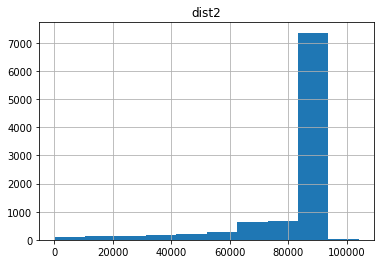

In [597]:
dist_toX_label.hist('dist2')

In [657]:
dist_toX_label_select = dist_toX_label[(dist_toX_label['label']==0) & (dist_toX_label['dist2']<30000)| (dist_toX_label['label']==1)]

In [658]:
X_select = X.loc[dist_toX_label_select.index]
y_select = y.loc[dist_toX_label_select.index]

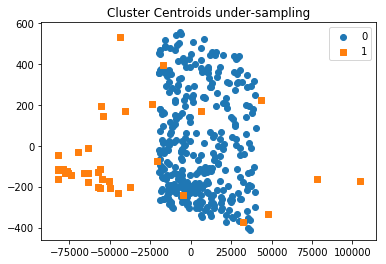

In [659]:
X_pca = pca.fit_transform(X_select)
plot_2d_space(X_pca, y_select, 'Cluster Centroids under-sampling')

In [660]:
len(y_select)

392

# split

In [661]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_select, y_select, test_size=0.3, random_state=6, stratify=y_select)

In [662]:
sc = StandardScaler()
sc.fit(X_train_s)
X_train_s_std = sc.transform(X_train_s)
X_test_s_std = sc.transform(X_test_s)

# KNN

In [668]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_train_s_std, y_train_s)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [669]:
y_pred = knn.predict(X_test_s_std)
y_pred_prob = knn.predict_proba(X_test_s_std)[:,1]

In [670]:
confusion_matrix(y_test_s, y_pred)

array([[106,   0],
       [  6,   6]])

Text(0.5, 1.0, 'ROC Curve')

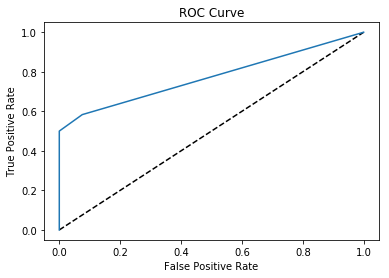

In [671]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_s, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [672]:
for i in np.arange(1, 11, 1):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_train_s_std, y_train_s)
    y_pred = knn.predict(X_test_s_std)
    print(confusion_matrix(y_test_s, y_pred))

[[100   6]
 [  6   6]]
[[106   0]
 [  8   4]]
[[106   0]
 [  6   6]]
[[106   0]
 [  8   4]]
[[106   0]
 [  7   5]]
[[106   0]
 [  9   3]]
[[106   0]
 [  8   4]]
[[106   0]
 [ 10   2]]
[[106   0]
 [  9   3]]
[[106   0]
 [ 10   2]]


In [673]:
print(classification_report(y_test_s, y_pred, target_names=['nothired', 'hired']))


              precision    recall  f1-score   support

    nothired       0.91      1.00      0.95       106
       hired       1.00      0.17      0.29        12

    accuracy                           0.92       118
   macro avg       0.96      0.58      0.62       118
weighted avg       0.92      0.92      0.89       118



# SVm

In [677]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, probability=True, random_state=1)
svm.fit(X_train_s_std, y_train_s)
y_pred = svm.predict(X_test_s_std)

In [679]:
confusion_matrix(y_test_s, y_pred)

array([[106,   0],
       [  3,   9]])

In [678]:
print(classification_report(y_test_s, y_pred, target_names=['nothired', 'hired']))

              precision    recall  f1-score   support

    nothired       0.97      1.00      0.99       106
       hired       1.00      0.75      0.86        12

    accuracy                           0.97       118
   macro avg       0.99      0.88      0.92       118
weighted avg       0.98      0.97      0.97       118



In [676]:
for i in np.arange(-1, 4):
    svm = SVC(kernel='linear', C=10.**i, probability=True, random_state=1)
    svm.fit(X_train_s_std, y_train_s)
    y_pred = svm.predict(X_test_s_std)
    print(confusion_matrix(y_test_s, y_pred))

[[106   0]
 [  3   9]]
[[106   0]
 [  3   9]]
[[106   0]
 [  3   9]]
[[106   0]
 [  3   9]]
[[106   0]
 [  3   9]]


In [681]:
y_pred_prob = svm.predict_proba(X_test_s_std)[:,1]

Text(0.5, 1.0, 'ROC Curve')

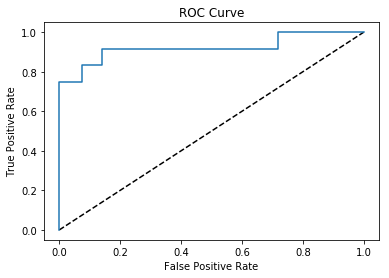

In [682]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_s, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')